# TUgas 5 - Ekstraksi Kata Kunci pada dokumen


In [ ]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/ppw/tugas/data_tugas5/data_label_news.xlsx")
data

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport
1,01-10-2023,Permintaan Maaf Eko ...,EKO Yuli Irawan mengucapkan permintaan maafnya...,Sport
2,01-10-2023,MotoGP Jepang 2023: ...,MOTEGI - Marc Marquez girang setelah bisa naik...,Sport
3,01-10-2023,Klasemen Sementara P...,KLASEMEN sementara perolehan medali Asian Game...,Sport
4,01-10-2023,Hasil Asian Games 20...,HASIL Asian Games 2023 akan dibahas di sini. T...,Sport
...,...,...,...,...
1917,01-12-2023,Ternyata Begini Pengelolaan Pasokan Batu Bara ...,JAKARTA - Pengelolaan batu bara untuk Pembangk...,Politik
1918,01-12-2023,Transaksi Perdagangan Berjangka Komoditi Dipre...,JAKARTA - Indonesia Commodity & Derivatives Ex...,Politik
1919,01-12-2023,"RUPS, Emiten Helikopter (HELI) Rombak Manajemen",JAKARTA - Emiten persewaan helikopter PT Jaya ...,Politik
1920,01-12-2023,PTPP Tunjuk Dhony Rahajoe Jadi Komisaris Utama,JAKARTA - PT PP (Persero) Tbk (PTPP) mengangka...,Politik


## Pre Processing

In [ ]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import re
import networkx as nx
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Ambil satu data

In [ ]:
sampel = data.head(1)
sampel

,Date,Title,Content,Label
0,01-10-2023,Asapi Francesco Bagn...,"ASAPI Francesco Bagnaia di MotoGP Jepang 2023,...",Sport


## Stopword

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Download stopwords dataset
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Hapus simbol dan angka menggunakan regular expression
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenisasi kata-kata
    words = word_tokenize(text)

    # Hapus stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Gabungkan kembali kata-kata yang sudah diolah
    processed_text = ' '.join(words)

    return processed_text

def build_co_occurrence_matrix(corpus, window_size):
    # Build unique words
    unique_words = set()
    for text in corpus:
        text = preprocess_text(text)
        for word in word_tokenize(text):
            unique_words.add(word)

    word_search_dict = {word: np.zeros(shape=(len(unique_words))) for word in unique_words}
    word_list = list(word_search_dict.keys())
    for text in corpus:
        text = preprocess_text(text)
        text_list = word_tokenize(text)
        for idx, word in enumerate(text_list):
            # Pick word in the size range
            i = max(0, idx - window_size)
            j = min(len(text_list) - 1, idx + window_size)
            search = [text_list[idx_] for idx_ in range(i, j + 1)]
            search.remove(word)
            for neighbor in search:
                # Get neighbor idx in word_search_dict
                nei_idx = word_list.index(neighbor)
                word_search_dict[word][nei_idx] += 1
    return word_search_dict

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
coo_dict=build_co_occurrence_matrix(sampel['Content'], window_size=1)

coo_dict

{'memenangkan': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'sulit': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 9., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 9.,
        0., 0.

In [ ]:
coo_df = pd.DataFrame(coo_dict,index=coo_dict.keys()).astype('int')
coo_df

,memenangkan,sulit,diguyur,ASAPI,Bagnaia,dilansir,puas,lintasan,Terdekat,murid,...,urutan,Pramac,Lenovo,ketat,Martinator,Indonesia,Valentino,mencoba,Honda,julukan
memenangkan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sulit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
diguyur,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASAPI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bagnaia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Indonesia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Valentino,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,0,0,0,0
mencoba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Honda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
coo_df.to_excel('matrix-coo-df.xlsx', index_label='Nama_Index')


## Graph

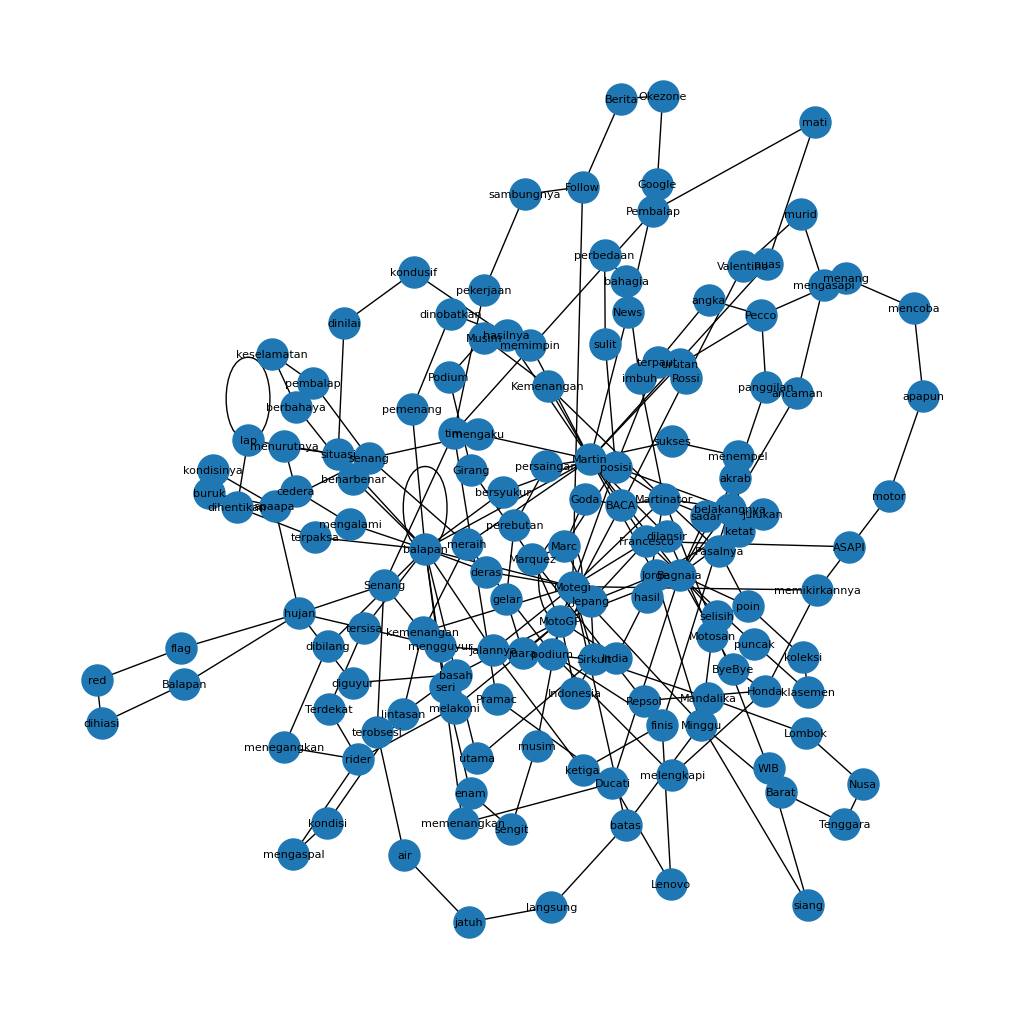

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert the DataFrame to a networkx graph
G = nx.from_pandas_adjacency(coo_df)

# Visualize the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=8, node_size=500, font_color='black')
plt.show()

## Page Rank

PageRank centrality adalah suatu metode untuk mengukur pentingnya simpul (node) dalam suatu jaringan berbasis graf. Metode ini awalnya dikembangkan oleh Larry Page dan Sergey Brin untuk menilai relevansi halaman web dalam mesin pencari Google, dan kemudian diadopsi dalam analisis jaringan umumnya. PageRank centrality mengukur seberapa penting atau otoritatif suatu simpul dengan memperhitungkan jumlah dan kualitas koneksi yang dimilikinya. Intinya, simpul-simpul yang dihubungkan dengan simpul lain yang juga memiliki keterhubungan yang tinggi akan mendapatkan skor PageRank yang lebih tinggi.



Rumus umum untuk menghitung nilai PageRank  dalam sebuah graf adalah:

$PR(A) = (1-d)  . \frac{1}{N}  + d \left( \frac{PR(T1)}{C(T1)} + \frac{PR(T2)}{C(T2)} + ... + \frac{PR(Tn)}{C(Tn)} \right)$



- $PR(A)$ adalah PageRank dari halaman $A$.

- $PR(T1)$ sampai $PR(Tn)$ adalah PageRank dari halaman $T1$ sampai $Tn$ yang mengarah ke halaman $A$ (yaitu halaman yang memiliki tautan ke $A$).

- $C(T1)$ sampai $C(Tn)$ adalah jumlah tautan keluar dari halaman $T1$ sampai $Tn$.

- $d$ adalah faktor damping, yang biasanya diatur ke 0.85


In [ ]:
# Menghitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)

for node, rank in pagerank.items():
    print(f"Node {node}: PageRank = {rank}")

Node memenangkan: PageRank = 0.001981429272162322
Node sulit: PageRank = 0.005874309988744816
Node diguyur: PageRank = 0.0034103688259226636
Node ASAPI: PageRank = 0.0012849163949953718
Node Bagnaia: PageRank = 0.028927888851500917
Node dilansir: PageRank = 0.005159626248389085
Node puas: PageRank = 0.002745988804272198
Node lintasan: PageRank = 0.00882383110634537
Node Terdekat: PageRank = 0.006583062774027854
Node murid: PageRank = 0.006005793319888241
Node benarbenar: PageRank = 0.006330933526136032
Node klasemen: PageRank = 0.005920402119962587
Node terobsesi: PageRank = 0.006300795958256331
Node Rossi: PageRank = 0.00508410150265404
Node pembalap: PageRank = 0.006277915599279769
Node batas: PageRank = 0.00621909201331667
Node Minggu: PageRank = 0.012049601380779176
Node mati: PageRank = 0.0034254436313742556
Node akrab: PageRank = 0.005800023991354461
Node melakoni: PageRank = 0.005880587862247371
Node keselamatan: PageRank = 0.006439153862589793
Node ancaman: PageRank = 0.0056306

In [ ]:
pr = nx.pagerank(G)
sorted_d = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
sorted_d

[('Martin', 0.034646271051308505),
 ('MotoGP', 0.033654682876305284),
 ('balapan', 0.03145920732947488)]

## Hitung manualnya:

https://docs.google.com/spreadsheets/d/1VwTRbX8RHhjUbQojaMSVYhkoLBj7wwfL/edit?usp=sharing&ouid=115908239064383970779&rtpof=true&sd=true

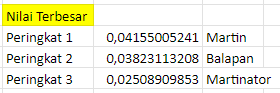